# Information from the paper
There is a close coupling system established between biota and the environment. However, to fully simulate a vastly complex environment requires mathematical equations that may be hard to prove or even formulate.  
The purpose of Daisyworld is to investigate the root fundamental system of a simple biosphere that may help in regulating temperature. We can also use a few established equations from population ecology theory.  

# The biosphere
Daisyworld has a negligible atmospheric greenhouse.
There are two species of daisy: black and white. (By logic, the black daisies reflect less light than bare ground, and the white daiseis reflect more light than bare ground).  
The growth rate of daisies are solely dependent on temperature.  
In turn, the presence of daisies affect the temperature based on the amount of radiation they reflection (we call this **albedo**).

# The equations
Daisy's coverage, $A_i$ is governed by $${dA_i \over dt} = A_i(A_g\beta_i - \gamma)$$  
Where:  
-$A_b$ and $A_w$ are the areas covered by the black and white daisies  
  
-$A_g$ is the area of empty fertile ground, governed by the equation  
$$A_g = 1 - A_w - A_b$$   
(We are assuming that the entire ground is **flat** and **fertile**)  
  
-$B$ is the growth rate of daisies per unit time, governed by the equation  
$$\beta_i = 1 - 0.003265 \times ((22.5+273.15) - T_i)^2$$  
Where $T_i$ refers to the daisies temperature.  
(This is a parabolic function where $0.003265$ is set so that the growth rate is 0 before $5^\circ C$ and after $40^\circ C$. The optimum temmperature is at $22.5^\circ C$. We perform our calculations in K)  
  
-$\gamma$ is the death rate per unit time  
  
## Explaning temperature calculations.
Stefan-Boltzmann Law gives the flux of energy, $F$  
($F, Wm^{-2}$, rate of transfer of energy per unit area emitted by a blackbody object at a specific temperature)  
Note: This assumes a **perfect** blackbody, ie. one that absorbs/radiates all incoming light and does not reflect any back  
$$F=\sigma T^4$$  
Where $\sigma$ is the Stefan-Boltzmann constant $\sigma = 5.67 \times 10^{-8} W m^{-2} K^{-4}$  
    
The effective temperature at which the planet radiates would equal to the amount absorbed from the Sun.  
$$E_{absorbed} = E_{emmitted}$$  
However, the flux emitted from the Sun would be lost over time based on its distance. Here, we use the inverse square law:  
$${F \over S_0} = {R_p^2 \over r_p^2}$$  
Where $S_0$ is the insolation constant (flux received by a planet), $R_p$ is the distance from the Sun and $r_p$ is the radius of the Sun.  
However, not all energy is being absorbed by the planet and must thus be subtracted by the planets **albedo, $\alpha$**:
$$S_0(1-\alpha_p)$$  
Since the planet has barren ground, black and white daisies, the planets albedo can be calculated by  
$$\alpha_p = A_w\alpha_w + A_b\alpha_b + A_g\alpha_g$$

To calculate the energy, we have to multiple it by its effective surface area. For simplicity, Daisyworld is a **flat** planet and we can leave it as a constant.  
$$T_p^4 = L \times {S_0 \over \sigma}(1 - \alpha_p)$$  
Where $L$ is the luminosity cosntant.  
$$\sigma(T_p^4 + 273)^4 = SL(1-A)$$  
Where $S$ is a constant having units of flux (insulation).
  

$$T_i^4 = RL \times {S_0 \over \sigma} \times (\alpha_p - \alpha_i) + T_p^4$$

In [1]:
from matplotlib import pyplot as plt
import numpy as np
class daisy():
    """
    Creates the attributes needed within a daisy.
    Creates the methods needed for daisy growth.
    
    Attributes:
        CONSTANTS
        self.D = death rate
        self.ALB = albedo
        slef.INSUL = insulation constant
        self.temp = tempaerature
        self.growth = growth
        
        VARIABLES
        self.cov = coverage
        self.cov_lst = list of daisy coverage for plotting
    
    Methods:
        d_temp: calculates and updates the daisies collective temperature
        growth_r: calculates and updates the growth of daisies
        d_cov: calculates the rate of growth of daisies
    """
    def __init__(self, color, cov):
        self.D = 0.3
        self.ALB = 0.75 if color == 'w' else 0.25
        self.INSUL = 0.2
        self.temp = 0 #TEMPORARY
        self.growth = 0 #TEMPORARY
        self.cov = cov
        self.cov_lst = []
        
    def d_temp(self, lumin, INSOL, SB, p_alb, p_temp4):
        self.temp = ((self.INSUL * lumin) * \
        (INSOL/SB) * (p_alb - self.ALB) + p_temp4) ** (1/4)
        
    def growth_r(self):
        self.growth = 1 - 0.003265 * ((295.65 - self.temp)**2)
    
    def d_cov(self, g_cov, dt):
        return (self.cov * ((g_cov*self.growth) - self.D)) * dt

In [2]:
class world():
    """
    Creates the attributes needed within the world.
    Creates the methods needed to simulate daisyworld.
    
    Attributes:
        CONSTANTS
        self.INSOL = insolation constant
        self.SB = stefan boltzmann constant
        self.ALB = albedo
        self.p_alb = planet's albedo
        self.temp4 = planet's temperature ** 4
        self.temp_lst = list of planet's temperature for plotting
        
        VARIABLES
        self.t = time
        self.dt = time step
        self.cov = coverage
        self.t_lst = For plotting
        self.bdaisy = black daisies
        self.wdaisy = white daisies
        self.lumin = luminosity
        self.static = checks for luminosity
        
    Methods:
        ground_gov: calculates and updates the ground coverage
        alb: calculates and updates planet's albedo
        p_temp: calculates and updates the planet's temperature. Takes in argument luminosity.
        
        
    """
    def __init__(self, t, dt, b_daisy, w_daisy, static):
        self.INSOL = 917
        self.SB = 5.670367*1e-8
        self.ALB = 0.5
        self.p_alb = 0 #TEMPORARY
        self.temp4 = 22.5+273.15 #TEMPORARY
        self.temp_lst = []
        self.lumin = 1 if static == 'yes' else list(np.linspace(0.5,1.6,int(t/dt))) #[::-1]
        self.static = True if static == 'yes' else False
        
        self.t = t
        self.dt = dt
        self.cov = 0 #TEMPORARY
        self.t_lst = (np.linspace(0,t,int(t/dt)))
        self.bdaisy = bdaisy
        self.wdaisy = wdaisy
        
    def ground_cov(self):
        self.cov = 1 - self.bdaisy.cov - self.wdaisy.cov
    
    def alb(self):
        self.p_alb = (self.bdaisy.cov * self.bdaisy.ALB) + \
        (self.wdaisy.cov * self.wdaisy.ALB) + \
        (self.cov * self.ALB)
        
    def p_temp(self, lumin):
        self.temp4 = lumin * ((self.INSOL/self.SB) * (1 - self.p_alb))
    
    def equil_state(self, lumin):
        for i in range(len(self.t_lst)):
            self.ground_cov()
            self.alb()
            self.p_temp(lumin)
            self.bdaisy.d_temp(lumin, self.INSOL, self.SB, self.p_alb, self.temp4)
            self.wdaisy.d_temp(lumin, self.INSOL, self.SB, self.p_alb, self.temp4)
            self.bdaisy.growth_r()
            self.wdaisy.growth_r()
            self.bdaisy.cov += self.bdaisy.d_cov(self.cov, self.dt)
            self.wdaisy.cov += self.wdaisy.d_cov(self.cov, self.dt)
            
            #Checking for negative daisies
            if self.bdaisy.cov < 0.01:
                self.bdaisy.cov = 0.01 
            if self.wdaisy.cov < 0.01:
                self.wdaisy.cov = 0.01
        return ((self.temp4 ** (1/4)-273.15), self.bdaisy.cov, self.wdaisy.cov)
        
    def run(self):
        if type(self.lumin) == int:
            lumin = self.lumin
            for i in range(len(self.t_lst)):
                self.ground_cov()
                self.alb()
                self.p_temp(lumin)
                self.bdaisy.d_temp(lumin, self.INSOL, self.SB, self.p_alb, self.temp4)
                self.wdaisy.d_temp(lumin, self.INSOL, self.SB, self.p_alb, self.temp4)
                self.bdaisy.growth_r()
                self.wdaisy.growth_r()
                self.bdaisy.cov += self.bdaisy.d_cov(self.cov, self.dt)
                self.wdaisy.cov += self.wdaisy.d_cov(self.cov, self.dt)
            
                #Checking for negative daisies
                if self.bdaisy.cov < 0.01:
                    self.bdaisy.cov = 0.01 
                if self.wdaisy.cov < 0.01:
                    self.wdaisy.cov = 0.01 
            
                #Data storing
                self.temp_lst.append(((self.temp4 ** (1/4)-273.15)))
                self.bdaisy.cov_lst.append(self.bdaisy.cov)
                self.wdaisy.cov_lst.append(self.wdaisy.cov)

        else:
            for lumin in self.lumin:
                self.equil_state(lumin)
                self.temp_lst.append(((self.temp4 ** (1/4)-273.15)))
                self.bdaisy.cov_lst.append(self.bdaisy.cov)
                self.wdaisy.cov_lst.append(self.wdaisy.cov)

        return (self.t_lst, self.temp_lst, self.bdaisy.cov_lst, self.wdaisy.cov_lst, self.lumin)
            


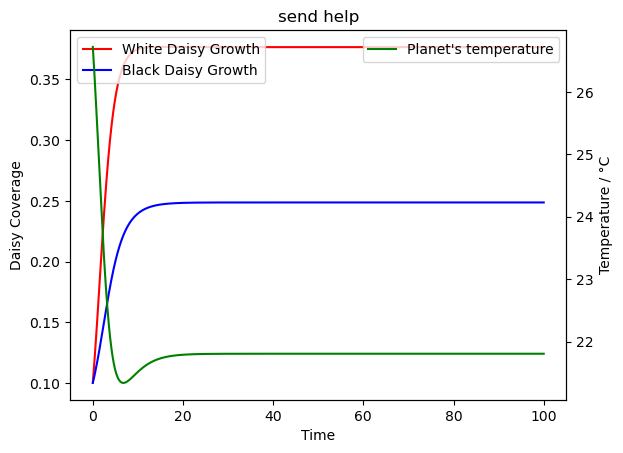

In [21]:
bdaisy = daisy('b', 0.1)
wdaisy = daisy('w', 0.1)
daisyworld = world(100,0.01, bdaisy, wdaisy, 'yes')
t_lst, temp_lst, bdaisy_cov_lst, wdaisy_cov_lst, lumin = daisyworld.run()
#Plotting
ax1 = plt.subplot()
ax2 = plt.subplot()
ln1 = ax1.plot(t_lst, wdaisy_cov_lst, color = 'r', label = 'White Daisy Growth')
ln2 = ax2.plot(t_lst, bdaisy_cov_lst, color = 'b', label = 'Black Daisy Growth')
ax3 = ax1.twinx()
ln3 = ax3.plot(t_lst, temp_lst, color = 'g', label = 'Planet\'s temperature')
plt.title("send help")
ax1.legend(loc = "upper left")
ax3.legend(loc = "upper right")
ax1.set_xlabel("Time")
ax1.set_ylabel("Daisy Coverage")
ax3.set_ylabel("Temperature / °C")
plt.show()

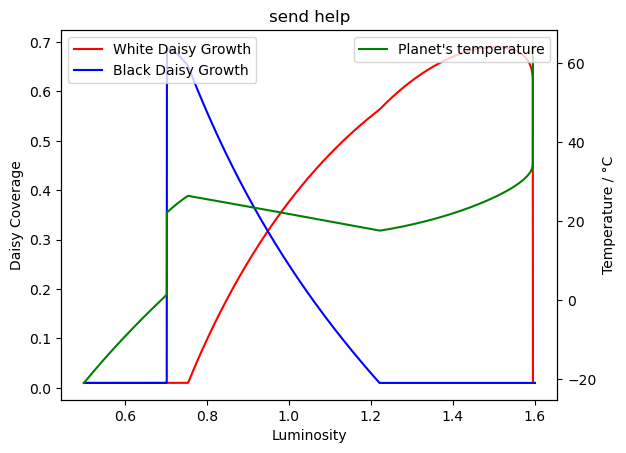

In [22]:
bdaisy = daisy('b', 0.1)
wdaisy = daisy('w', 0.1)
daisyworld = world(50,0.01, bdaisy, wdaisy, 'no')
t_lst2, temp_lst2, bdaisy_cov_lst2, wdaisy_cov_lst2, luminlst2 = daisyworld.run()
#Plotting
ax1 = plt.subplot()
ax2 = plt.subplot()
ln1 = ax1.plot(luminlst2, wdaisy_cov_lst2, color = 'r', label = 'White Daisy Growth')
ln2 = ax2.plot(luminlst2, bdaisy_cov_lst2, color = 'b', label = 'Black Daisy Growth')
ax3 = ax1.twinx()
ln3 = ax3.plot(luminlst2, temp_lst2, color = 'g', label = 'Planet\'s temperature')
plt.title("send help")
ax1.legend(loc = "upper left")
ax3.legend(loc = "upper right")
ax1.set_xlabel("Luminosity")
ax1.set_ylabel("Daisy Coverage")
ax3.set_ylabel("Temperature / °C")
plt.show()

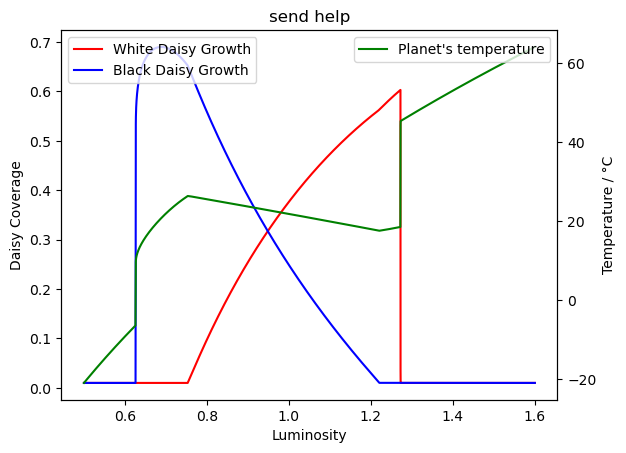

In [23]:
#This graph was cheesed
bdaisy = daisy('b', 0.1)
wdaisy = daisy('w', 0.1)
daisyworld = world(50,0.01, bdaisy, wdaisy, 'no')
daisyworld.lumin = daisyworld.lumin[::-1]
t_lst3, temp_lst3, bdaisy_cov_lst3, wdaisy_cov_lst3, lumin_lst3 = daisyworld.run()
#Plotting
ax1 = plt.subplot()
ax2 = plt.subplot()
ln1 = ax1.plot(lumin_lst3, wdaisy_cov_lst3, color = 'r', label = 'White Daisy Growth')
ln2 = ax2.plot(lumin_lst3, bdaisy_cov_lst3, color = 'b', label = 'Black Daisy Growth')
ax3 = ax1.twinx()
ln3 = ax3.plot(lumin_lst3, temp_lst3, color = 'g', label = 'Planet\'s temperature')
plt.title("send help")
ax1.legend(loc = "upper left")
ax3.legend(loc = "upper right")
ax1.set_xlabel("Luminosity")
ax1.set_ylabel("Daisy Coverage")
ax3.set_ylabel("Temperature / °C")
plt.show()

Text(0.5, 1.0, 'send help')

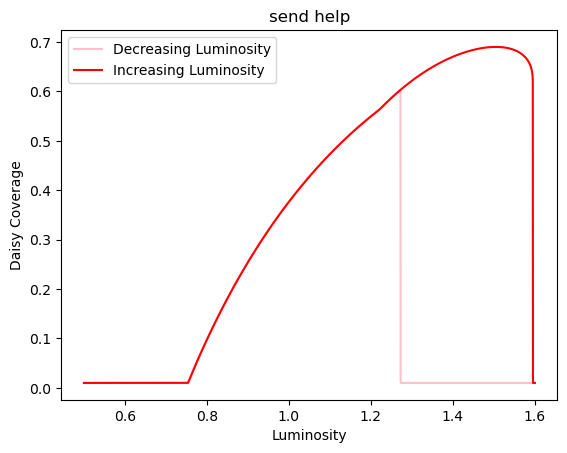

In [24]:
ax1 = plt.subplot()
ax2 = plt.subplot()
ln1 = ax1.plot(lumin_lst3[::-1], wdaisy_cov_lst3[::-1], color = 'pink', label = 'Decreasing Luminosity')
ln3 = ax1.plot(luminlst2 , wdaisy_cov_lst2, color = 'r', label = 'Increasing Luminosity')
ax1.legend(loc = "upper left")
ax1.set_xlabel("Luminosity")
ax1.set_ylabel("Daisy Coverage")
plt.title("send help")

Text(0.5, 1.0, 'send some help')

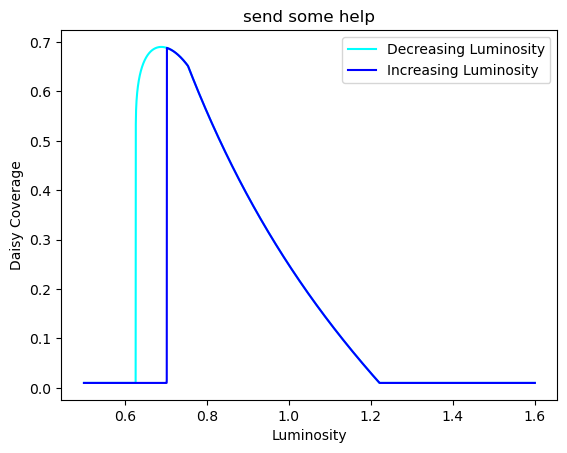

In [25]:
ax1 = plt.subplot()
ax2 = plt.subplot()
ln2 = ax2.plot(lumin_lst3[::-1], bdaisy_cov_lst3[::-1], color = 'cyan', label = 'Decreasing Luminosity')
ln4 = ax2.plot(luminlst2, bdaisy_cov_lst2, color = 'b', label = 'Increasing Luminosity')
ax1.legend(loc = "upper right")
ax1.set_xlabel("Luminosity")
ax1.set_ylabel("Daisy Coverage")
plt.title("send some help")

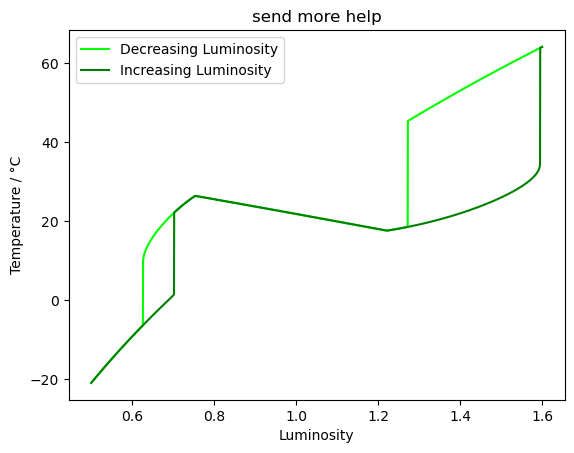

In [26]:
ax3 = plt.subplot()
ln5 = ax3.plot(lumin_lst3[::-1], temp_lst3[::-1], color = 'lime', label = 'Decreasing Luminosity')
ln6 = ax3.plot(luminlst2, temp_lst2, color = 'g', label = 'Increasing Luminosity')
plt.title("send more help")
ax3.legend(loc = "upper left")
ax3.set_xlabel("Luminosity")
ax3.set_ylabel("Temperature / °C")
plt.show()

# Tutorial  
Albedo: the proportion of the incident light or radiation that is reflected by a surface.  

Earth has a vast body of liquid water which aids in stabilising temperature (we can achieve the "Goldilocks zone")  
Ohter natural phenomena such as volcanic eruiptions also further contributes to temperature fluctuations.  
Formation of clouds as well (water vapour itself is a greenhouse gas but clouds are also known to reflect solar radiation)  
  
In Venus, there is a minute amount of water vapour. (We want to look at the feedback)  
When solar radiation increases --> water vapour concentration increases --> Temperature further increases (positive feedback)  
What happens is that water vapor is broken down by UV which produces hydrogen, allowing it to leave venus.  
This is the differentiating factor with Earth because we have a layer of ozone which buffers against UV.  

On Mars, there is an ice albedo feeeback looop.  
When temperature decreases, the amount of ice formation increases, causing the albedo to increase and temperature to further decrease (positive feedback loop)  



Hysteresis occurs when there are multiple equilibrium paths, depending on the previous conditions prior to the hysteresis zone

In [ ]:
#ChatGPT converted code for a 2D World which I have no idea what is going on
import random
import math

class Daisy:
    def __init__(self, albedo, phenotype_volatility):
        self.albedo = albedo
        self.phenotype_volatility = phenotype_volatility

    @classmethod
    def black(cls):
        return cls(0.25, 0.05)

    @classmethod
    def white(cls):
        return cls(0.75, 0.05)

    def reproduce_prob(self, temperature):
        threshold = 17.5
        optimal_temperature = 295.5
        if abs(temperature - optimal_temperature) < threshold:
            return 1.0 - ((temperature - optimal_temperature) / threshold) ** 2
        else:
            return 0.0

    def offspring(self):
        new_albedo = self.albedo + self.phenotype_volatility * (random.random() - 0.5)
        new_albedo = max(0.0, min(1.0, new_albedo))
        return Daisy(new_albedo, self.phenotype_volatility)

class World:
    def __init__(self, dim, death_rate):
        self.dim = dim
        self.daisies = [None] * (dim[0] * dim[1])
        self.death_rate = death_rate

    def size(self):
        return self.dim[0] * self.dim[1]

    def iter(self):
        return WorldIterator(self)

    def at(self, i):
        if 0 <= i < self.size():
            return self.daisies[i]
        else:
            return None

    def above(self, i):
        if i >= self.dim[1]:
            return self.at(i - self.dim[1])
        else:
            return None

    def below(self, i):
        if i < self.size() - self.dim[1]:
            return self.at(i + self.dim[1])
        else:
            return None

    def left_of(self, i):
        if i > 0:
            return self.at(i - 1)
        else:
            return None

    def right_of(self, i):
        if i < self.size() - 1:
            return self.at(i + 1)
        else:
            return None

    def albedo(self):
        return sum(d.albedo if d else 0.5 for d in self.daisies) / self.size()

    def temperature_field(self):
        q = 0.125  # neighbor diffusivity
        S = 917.0  # solar insolation
        SB = 5.67e-8
        L = 1.0  # luminosity

        def calc_albedo(i):
            return (1.0 - 4.0 * q) * (self.at(i).albedo if self.at(i) else 0.5) + \
                   q * (self.above(i).albedo if self.above(i) else 0.5) + \
                   q * (self.right_of(i).albedo if self.right_of(i) else 0.5) + \
                   q * (self.left_of(i).albedo if self.left_of(i) else 0.5) + \
                   q * (self.below(i).albedo if self.below(i) else 0.5)

        return [(S * L / SB * (1.0 - calc_albedo(i))) ** 0.25 for i in range(self.size())]

    @classmethod
    def new_randomized(cls, dim, death_rate):
        def new_daisy_opt():
            r = random.random()
            if r < 0.1:
                return Daisy.black()
            elif r < 0.2:
                return Daisy.white()
            else:
                return None

        daisies = [new_daisy_opt() for _ in range(dim[0] * dim[1])]
        return cls(dim, death_rate, daisies)

    def iterate(self):
        new_world = World(self.dim, self.death_rate)
        tfield = self.temperature_field()

        for i in range(self.size()):
            daisy = self.daisies[i]
            if daisy is not None:
                continue

            temp = tfield[i]

            r = random.random()
            if r < 0.25:
                neighbour = self.above(i)
            elif r < 0.5:
                neighbour = self.right_of(i)
            elif r < 0.75:
                neighbour = self.below(i)
            else:
                neighbour = self.left_of(i)

            prob = neighbour.reproduce_prob(temp) if neighbour else 0.0

            if random.random() < prob:
                new_world.daisies[i] = neighbour.offspring()

        for i in range(self.size()):
            if self.daisies[i] is not None and random.random() < self.death_rate:
                new_world.daisies[i] = None

        return new_world

    def print_stats(self):
        count_empty = sum(1 for d in self.daisies if d is None)
        planetary_albedo = self.albedo()

        print(f"empty cells: {count_empty}")
        print(f"planetary albedo: {planetary_albedo}")

class WorldIterator:
    def __init__(self, world):
        self.pos = 0
        self.world = world

    def __iter__(self):
        return self

    def __next__(self):
        if self.pos < self.world.size():
            result = self.world.at(self.pos)
            self.pos += 1
            return result
        else:
            raise StopIteration

def main():
    print("it compiled!")
    world = World.new_randomized((20, 20), 0.3)

    for timestep in range(30):
        world = world.iterate()
        world.print_stats()

if __name__ == "__main__":
    main()


In [ ]:
#Yugan's code
b=[[0 for i in range(100)] for i in range(100)]
white = 0
black = 0
for j in range(2):
    color = j+1
    for i in range(100):
        x,y=randrange(100), randrange(100)
        while b[x][y] != 0:
            x,y = randrange(100), randrange(100)
        b[x][y] = color
        if b[x][y] == 1:
            white+=1
        elif b[x][y] == 2:
            black+=1
plt.imshow(b)
plt.colorbar(plt.imshow(b))

In [ ]:
#Updated
import random
bnew = copy.deepcopy(b)


def neighbour(i,j, grid):
    return [grid[i+a][j+b] for a in range(-1,2) for b in range(-1,2)
            if 0<= i+a <=len(grid)-1 and 0<=j+b <=len(grid[0])-1
            and a!=b and (a==0 or b==0)]

S = 917
L = 0.9
ab,aw,ag = 0.25,0.75, 0.5
sigma = 5.670367* (10 ** -8)
R = 0.2
y = 0.3
Awhite, Ablack = 0.01, 0.01

def helper(dAwhite, dAblack):
    n = random.random()
    if dAwhite <0 and dAblack >0 :
        return 2 if n<dAblack else 0
    elif dAblack <0 and dAwhite >0:
        return 1 if n<dAwhite else 0
    elif dAblack <0 and dAwhite <0:
        return 0 # no growth
    else:
        if dAwhite > dAblack:
            if n < dAwhite:
                return 1
            if n < dAblack:
                return 2
            return -1
        else:
            if n < dAblack:
                return 2
            if n < dAwhite:
                return 1
            return -1

for i in range(1000):
    ap = Awhite*aw +(1-Awhite-Ablack)*(ag) + Ablack*ab #.55
    Tp = (L*(S/sigma)*(1-ap))**(1/4)
    Tw = ((R*L*(S/sigma)*(ap - aw)) + Tp4)(1/4)
    Tb = ((R*L*(S/sigma)*(ap - ab)) + Tp4)(1/4)
    Bwhite = 1-0.003265*((22.5 +273.15  - Tw)**2)
    Bblack = 1-0.003265*((22.5 +273.15  - Tb)**2)
    old_Awhite = Awhite
    dAwhite = Awhite*((1-Awhite-Ablack)*Bwhite - y)  
    dAblack = Ablack*((1-Ablack-old_Awhite)*Bblack - y)
    #print(dAwhite, dAblack)
    total_color = []
    choose_to_die = []
    Awhite, Ablack = 0,0
    for j in range(100):
        for k in range(100):
            neighbours = neighbour(j,k,b) #length 2,3,4
            if len(set(neighbours)) == 1: #overcrowding, all the same color 
                bnew[j][k] = 0
            elif neighbours.count(1)>0 or neighbours.count(2) >0:
                if neighbours.count(1) == 0:
                    bnew[j][k] = 2 if random.random() < dAblack else b[j][k]
                if neighbours.count(2) == 0:
                    bnew[j][k] = 1 if random.random() < dAwhite else b[j][k]
                else:
                    result = helper(dAwhite, dAblack)
                    if result != -1:
                        bnew[j][k] = result
            color = bnew[j][k]
            if color == 1 or color == 2:
                total_color.append((j,k))
    for row, col in total_color:
        if bnew[row][col] == 1:
            Awhite +=1
        if bnew[row][col] == 2:
            Ablack +=1
    b=bnew
    #print(Awhite, Ablack)
    Awhite /= 10000
    Ablack /= 10000

plt.imshow(b)
plt.colorbar(plt.imshow(b))